##  Phenotypic phase planes

In [16]:
#In this screipt we analyse the phenotype phase planes for all relevant conditions: aerobic and anaerobic.
import pandas as pd
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
plt.style.use('ggplot')


In [8]:
# Verify working directory and change it if needed
# import os
# os.getcwd()
#os.chdir("DIR_PATH") #change accordingly

'/Users/abril/Documents/DTU/CFD_Resveratrol/27410-group-assigment-group-4-resveratrol-in-s-cerevisiae'

In [9]:
model = read_sbml_model("data/models/yeast_resv.xml")

In [10]:
# Original medium, no modifications done yet.
medium = model.medium

#### Phenotype phase plane for res-yeast.xml model

In [11]:
ppp_biomass = production_envelope( model,
    reactions = model.reactions.EX_glc__D_e,
    objective = model.reactions.VVVST1)

In [12]:
ppp_biomass

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e
0,EX_glc__D_e,0.0,0.0,NaN,1.178571,1.414286e+00,NaN,-10.000000
1,EX_glc__D_e,0.0,0.0,NaN,1.133724,1.435581e+00,NaN,-9.476780
2,EX_glc__D_e,0.0,0.0,NaN,1.088877,1.459366e+00,NaN,-8.953560
3,EX_glc__D_e,0.0,0.0,NaN,1.044029,1.486103e+00,NaN,-8.430341
4,EX_glc__D_e,0.0,0.0,NaN,0.999182,1.516378e+00,NaN,-7.907121
5,EX_glc__D_e,0.0,0.0,NaN,0.954334,1.550943e+00,NaN,-7.383901
6,EX_glc__D_e,0.0,0.0,NaN,0.909487,1.590781e+00,NaN,-6.860681
7,EX_glc__D_e,0.0,0.0,NaN,0.864640,1.637197e+00,NaN,-6.337461
8,EX_glc__D_e,0.0,0.0,NaN,0.819792,1.691967e+00,NaN,-5.814241
9,EX_glc__D_e,0.0,0.0,NaN,0.774945,1.757569e+00,NaN,-5.291022


<AxesSubplot: xlabel='Glucose uptake [mmol/g DW/h]', ylabel='Biomass objective [1/h]'>

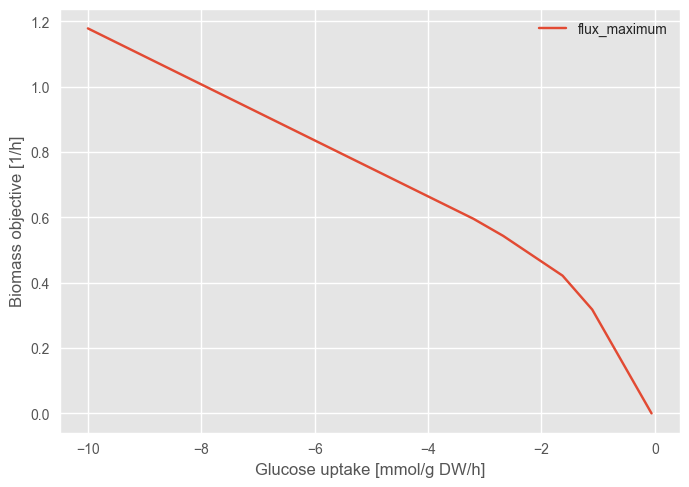

In [18]:
ppp_biomass.plot(x='EX_glc__D_e', y='flux_maximum', xlabel="Glucose uptake [mmol/g DW/h]", ylabel="Biomass objective [1/h]")


##### Determining the optimal O2 uptake rate

In [25]:
ppp_o2 = production_envelope(model,
                    reactions=model.reactions.EX_o2_e,
                    objective=model.reactions.VVVST1)
                    

In [26]:
#ppp_o2.EX_o2_e[ppp_o2.flux_maximum.idxmax()]

<AxesSubplot: xlabel='EX_o2_e'>

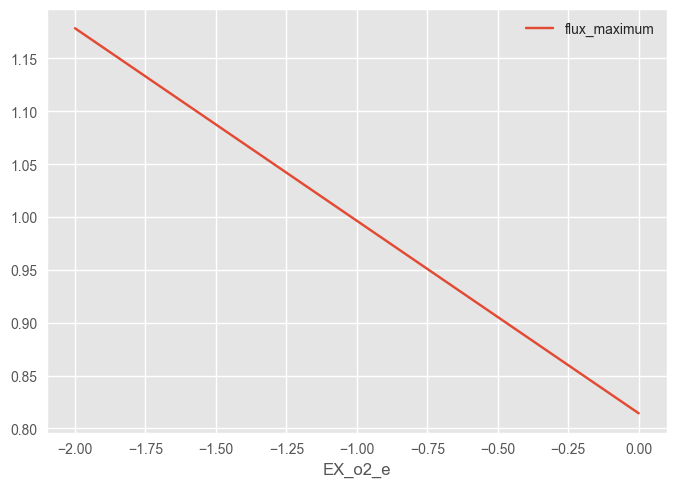

In [27]:
ppp_o2.plot(x='EX_o2_e', y='flux_maximum')
